# Euclid Testing

This is an example notebook showing the Euclid Dynamic Testing code written by Chris in action.

In [1]:
from DynamicTesting import * 
# Utility Functions for now.
import numpy as np
from matplotlib import pyplot as plt

# Make sure we have access to the higher level directory.
import sys
sys.path.insert(0, '../')

# Set the redshift of interest here.
redshift = 0.0

The variables we wish to test are listed in arrays for easy repeated access.

In [2]:
# Variations
iterations = 4
knee = [0.5, 0, -0.5, -0.5]
alpha = [-0.1, -0.5, -0.1, -0.5]
# Empty arrays in which we will store the plotting data.
XLF, XLF_Bins, Edd_dists, Edd_bins, WP, WP_bins = [], [], [], [], [], []

Next we create the class, and we call the approprate member functions to read in the data, assign the variables we want and then return the plotting data. Much of the best behaviour is encapsulated by the default arguments, so some parameters do not need to be called. Running this section can take some time.

Note that calling the member function to load in the multidark data expects a file in a subfolder '/BigData/' that is named 'MD_<redshift>.npy, in with the columns x, y, z, scale at accretion, mass at accretion, and (for testing purposes) mvir.

In [3]:
# Create the master class. This only requires the redshif. Different cosmologies can be set, default is planch18
obj = EuclidMaster(redshift)
# Load in the MultiDark Haloes. Needless to say, this is memory intensive, which is why we are only doing it once.
obj.loadMultiDarkHaloes()
# We assign stellar mass using the default prescription, which is Grylls 18.
obj.assignStellarMass()
# We assign black hole mass, using the default, Shankar 16.
obj.assignBlackHoleMass()
# We assign the Duty Cycle, which is set to Mann. This could be inside the loop below if variations are desired.
dutycycle = "Mann"
obj.assignDutyCycle(function = dutycycle)

# Loop to support variations in parameters
for i in range(iterations):
    # We assign Eddington ratio using varying parameters from the previously defined arrays.
    obj.assignEddingtonRatios(knee = knee[i], alpha = alpha[i])
    
    # We extract the xlf from this iteration.
    xlf, bins = obj.getLuminosityFunction()
    # and append the data to storage arrays
    XLF.append(xlf.copy())
    XLF_Bins.append(bins.copy())
    
    # We repeat this with the Eddington Distribution
    prob, bins = obj.getEddingtonDistribution()
    Edd_dists.append(prob.copy())
    Edd_bins.append(bins.copy())
    
    # The CreateCatalogue function creates a catalogue from the duty cycle, and performs the luminosity cut.
    obj.CreateCatalogue()
    # The Obscuration will assign Nh and only select obscured galaxies by default.
    obj.Obscuration()
    # We then compute wp on this catalogue, and extract the data.
    wp, bins = obj.computeWP()
    WP.append(wp)
    WP_bins.append(bins)

Loading MultiDark Haloes
Assigning Stellar Mass
Assigning Black Hole Mass
Assigning Duty Cycle
Assigning Eddington Ratios
Creating Catalogue
4.32% of Galaxies remain as AGN
Calculating Obscuration
89.79% of the remaining catalogue remains as obscured
Computing wp


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 46,46,29.  Time taken =   0.409 sec
Using AVX2 kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 13.655 secs


Assigning Eddington Ratios
Creating Catalogue
1.28% of Galaxies remain as AGN
Calculating Obscuration
86.1% of the remaining catalogue remains as obscured
Computing wp


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 46,46,29.  Time taken =   0.125 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.661 secs


Assigning Eddington Ratios
Creating Catalogue
3.05% of Galaxies remain as AGN
Calculating Obscuration
88.16% of the remaining catalogue remains as obscured
Computing wp


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 46,46,29.  Time taken =   0.276 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  6.774 secs


Assigning Eddington Ratios
Creating Catalogue
1.18% of Galaxies remain as AGN
Calculating Obscuration
92.97% of the remaining catalogue remains as obscured
Computing wp


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 46,46,29.  Time taken =   0.128 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.713 secs


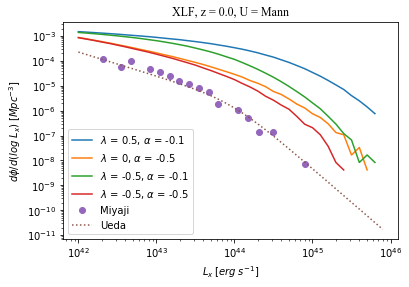

In [4]:
# Plot of the XLF

plt.figure()

for i, xlf in enumerate(XLF): 
    plt.plot(10**XLF_Bins[i], 10**xlf, label = r"$\lambda$ = {}, $\alpha$ = {}".format(knee[i], alpha[i]))
    
# XLF Data
XLF = XLF_Data(redshift)
plt.plot(10**XLF.Mi_LX, 10**XLF.Mi_phi, 'o', label = "Miyaji")

uXLF, ubins = XLF.getUeda14(np.arange(42, 46, 0.1))
plt.plot(10**ubins, 10**uXLF, ':', label = "Ueda")

# Plotting
plt.xlabel(r'$L_x\;[erg\;s^{-1}]$')
plt.ylabel(r'$d\phi /d(log\;L_x)\;[Mpc^{-3}]$')
plt.title(r'XLF, z = {}, U = {}'.format(redshift, dutycycle), fontname = 'Times New Roman')
plt.loglog()
plt.legend()
plt.show()

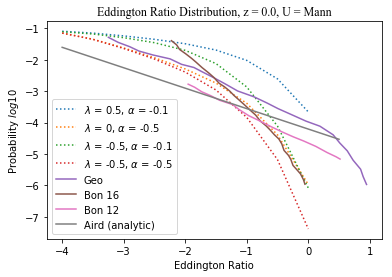

In [5]:
# Plot the Eddington ratio distribution

plt.figure()

for i, edd in enumerate(Edd_dists):
    plt.plot(Edd_bins[i], edd, ':',label = r"$\lambda$ = {}, $\alpha$ = {}".format(knee[i], alpha[i]))

EddData = EddingtonDistributionData(redshift)
plt.plot(EddData.Geo_LX, EddData.Geo_phi, label = "Geo")
plt.plot(EddData.Bon16_LX, EddData.Bon16_phi, label = "Bon 16")
plt.plot(EddData.Bon12_LX, EddData.Bon12_phi, label = "Bon 12")

eddbin = np.arange(-4, 1., 0.5)
probSche = EddData.AirdDist(eddbin)
plt.plot(eddbin, probSche, label = "Aird (analytic)")
plt.title(r'Eddington Ratio Distribution, z = {}, U = {}'.format(redshift, dutycycle), fontname = 'Times New Roman')
plt.xlabel("Eddington Ratio")
plt.ylabel("Probability $log10$")

plt.legend()

  
plt.show()


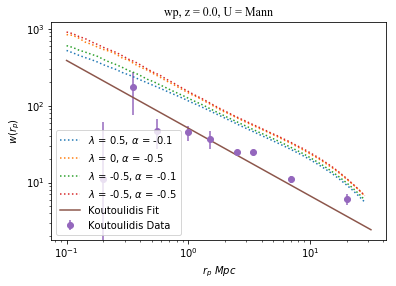

In [6]:
plt.figure()

wp_data = WP_Data(redshift)

for i, wp in enumerate(WP):
    plt.plot(WP_bins[i], wp, ':',label = r"$\lambda$ = {}, $\alpha$ = {}".format(knee[i], alpha[i]))

plt.errorbar(wp_data.r_Koutoulidis, wp_data.wp_Koutoulidis,\
                yerr = wp_data.wp_Koutoulidis_e, fmt='o', label = "Koutoulidis Data")

plt.plot(obj.wpbins, wp_data.K_powerLaw(obj.wpbins), label = "Koutoulidis Fit")
plt.title(r'wp, z = {}, U = {}'.format(redshift, dutycycle), fontname = 'Times New Roman')    
plt.xlabel(r'$r_p$ $Mpc$')
plt.ylabel(r'$w(r_p)$')    

plt.legend()
plt.loglog()
plt.show()
